In [1]:
import requests as reqs
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import math
import string
import matplotlib.pyplot as plt

In [2]:
URL = "https://superbowl-ads.com/cost-of-super-bowl-advertising-breakdown-by-year/"
page = reqs.get(URL)
soup = BeautifulSoup(page.text)
#table = soup.find(id ='my-players-table')
print(soup)

<!DOCTYPE html>

<!--[if IE 7]>
<html class="ie ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html class="ie ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 7) | !(IE 8)  ]>-->
<html lang="en-US">
<!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://superbowl-ads.com/xmlrpc.php" rel="pingback"/>
<meta content="Super Bowl Advertising News Reviews History" name="description"><title>Cost of Super Bowl Advertising Breakdown by Year – Superbowl-ads.com Video Archive</title>
<meta content="max-image-preview:large" name="robots">
<link href="//www.googletagmanager.com" rel="dns-prefetch">
<link href="//fonts.googleapis.com" rel="dns-prefetch">
<link href="//s.w.org" rel="dns-prefetch"/>
<link href="//i0.wp.com" rel="dns-prefetch"/>
<link href="//i1.wp.com" rel="dns-prefetch"/>
<link href="//i2.wp.com" rel="dns-prefetch"/>
<link href="//c0.wp.com" rel="dns-pre

In [13]:
table = soup.find('table' ,attrs={'border':'0'})
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    if row:
        res.append(row)

res.remove(res[0])
res.remove(res[0])
df = pd.DataFrame(res, columns=['Super Bowl', 'Season', 'Game Date', 'Network', 'Rating', 'Share', 'Avg. Cost of 30-Second Ad', 'Avg. Number of Viewers'])
df.index = np.arange(1,len(df)+1)

for index, row in df.iterrows():
    row["Avg. Number of Viewers"] = int(row["Avg. Number of Viewers"].replace(",", ""))

df

,Super Bowl,Season,Game Date,Network,Rating,Share,Avg. Cost of 30-Second Ad,Avg. Number of Viewers
1,LIV,2019,Feb 2 2020,FOX,41.6,69,"$5,600,000",99900000
2,LIII,2018,Feb 3 2019,CBS,41.1,67,"$5,200,000",98477000
3,LII,2017,Feb 4 2018,NBC,43.1,68,"$5,235,000",103400000
4,LI,2016,Feb 5 2017,FOX,45.3,70,"$5,400,000",111300000
5,L (50),2015,Feb 7 2016,CBS,46.6,72,"$4,800,000",111900000
6,XLIX,2014,Feb 1 2015,NBC,47.5,71,"$4,250,000",114442000
7,XLVIII,2013,Feb 2 2014,FOX,46.7,69,"$4,000,000",111500000
8,XLVII,2012,Feb 3 2013,CBS,48.1,71,"$3,800,000",108700000
9,XLVI,2011,Feb 5 2012,NBC,47.8,71,"$3,500,000",111346000
10,XLV,2010,Feb 6 2011,FOX,47.9,68,"$3,100,000",111010000


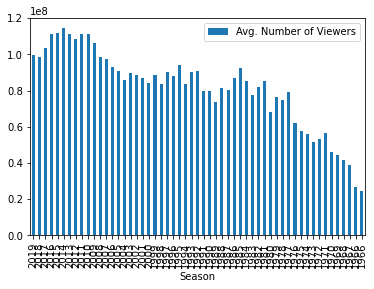

<Figure size 2160x1440 with 0 Axes>

In [32]:
# graph relationship between total viewers and cost for 30-second ad
#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df = df.iloc[::-1] # reverse the data frame
df.plot(kind='bar', x='Season', y='Avg. Number of Viewers', rot=0)
plt.xticks(rotation=90)
plt.figure(figsize=(30,20))
plt.xlabel = "Seasons (Year)"
plt.show()

mergedtable2 = mergedtable[mergedtable.yearID >= 1990]
mergedtable2 = mergedtable2[mergedtable2.yearID <= 2014]
mergedtable2 = mergedtable2.pivot(index ='teamID', columns='yearID', values='pay
mergedtable2.plot(kind = 'barh',title ="Payroll Distribution Across Time from 19
plt.ylabel("Payroll")
plt.xlabel("Teams")
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
# table_rows = table.find_all('tr')

# res = []
# for tr in table_rows:
#     td = tr.find_all('td')
#     row = [tr.text for tr in td]
#     if row:
#         res.append(row)
        
# res.remove(res[0]) # removes top row
# res.remove(res[0]) # removes top row
# df = pd.DataFrame(res, columns=['No.', 'Date', 'Site', 'Result'])
# df.index = np.arange(1,len(df)+1)

# newCol = [] # City of Interest

# for index, row in df.iterrows():
#     tempResult = row["Result"]
#     tempResult = tempResult.split(",") # returns an arr ["Green Bay 35", "Kansas City 10"]
#     tempResult = tempResult[1] # we want second element of arr
#     tempResult = tempResult.rstrip(string.digits) # removes the points the losing team had
#     tempResult = tempResult.strip()
    
#     # Rename losing team to correct City name
#     if tempResult == "Minnesota":
#         tempResult = "Minneapolis"
#     elif tempResult == "New York Giants":
#         tempResult = "New York City"
#     elif tempResult == "Los Angeles Rams":
#         tempResult = "Los Angeles"
#     elif tempResult == "New England":
#         tempResult = "Boston"
#     elif tempResult == "Carolina":
#         tempResult = "Charlotte"
#     elif tempResult == "Arizona":
#         tempResult = "Glendale"
#     elif tempResult == "Washington":
#         tempResult = "Washington D.C."
        
#     newCol.append(tempResult)
    
# df["City of Interest"] = newCol

# df

## Cities we Need to Tidy
Minnesota => Miniapolous
New York Giants => New York City
Los Angeles Rams => Los Angeles
New England => Boston
Carolina => Charlotte
Arizona => Glendale